# Covid-19 Project

In [2]:
# Importing the basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler , MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [3]:
import sys
import csv
import glob

In [4]:
path =r'D:\OneDrive - eClinicalWorks\Documents\Perspnal\Github\Covid data' # use your path 
allFiles = glob.glob(path + "/*.csv") 
df = pd.DataFrame() 
list_ = [] 
for file_ in allFiles: 
    frame = pd.read_csv(file_,index_col=None, header=0) 
    list_.append(frame) 
df = pd.concat(list_)

In [5]:
df.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-04-12 23:18:15,32.3182,-86.9023,3563,93,NaN,3470.0,1.0,75.988020,21583.0,437.0,2.610160,84000001.0,USA,460.300152,12.264945
1,Alaska,US,2020-04-12 23:18:15,61.3707,-152.4044,272,8,66.0,264.0,2.0,45.504049,8038.0,31.0,2.941176,84000002.0,USA,1344.711576,11.397059
2,Arizona,US,2020-04-12 23:18:15,33.7298,-111.4312,3542,115,NaN,3427.0,4.0,48.662422,42109.0,NaN,3.246753,84000004.0,USA,578.522286,NaN
3,Arkansas,US,2020-04-12 23:18:15,34.9697,-92.3731,1280,27,367.0,1253.0,5.0,49.439423,19722.0,130.0,2.109375,84000005.0,USA,761.753354,10.156250
4,California,US,2020-04-12 23:18:15,36.1162,-119.6816,22795,640,NaN,22155.0,6.0,58.137726,190328.0,5234.0,2.812020,84000006.0,USA,485.423868,22.961176


In [6]:
df.shape

(11096, 18)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11096 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        11096 non-null  object 
 1   Country_Region        11096 non-null  object 
 2   Last_Update           11077 non-null  object 
 3   Lat                   10696 non-null  float64
 4   Long_                 10696 non-null  float64
 5   Confirmed             11096 non-null  int64  
 6   Deaths                11096 non-null  int64  
 7   Recovered             8772 non-null   float64
 8   Active                11079 non-null  float64
 9   FIPS                  11077 non-null  float64
 10  Incident_Rate         10696 non-null  float64
 11  People_Tested         10696 non-null  float64
 12  People_Hospitalized   5129 non-null   float64
 13  Mortality_Rate        10887 non-null  float64
 14  UID                   11096 non-null  float64
 15  ISO3                  

In [8]:
# percentage of missing values in the dataframe
df.isna().mean()*100

Province_State           0.000000
Country_Region           0.000000
Last_Update              0.171233
Lat                      3.604903
Long_                    3.604903
Confirmed                0.000000
Deaths                   0.000000
Recovered               20.944484
Active                   0.153208
FIPS                     0.171233
Incident_Rate            3.604903
People_Tested            3.604903
People_Hospitalized     53.776136
Mortality_Rate           1.883562
UID                      0.000000
ISO3                     0.000000
Testing_Rate             3.604903
Hospitalization_Rate    53.776136
dtype: float64

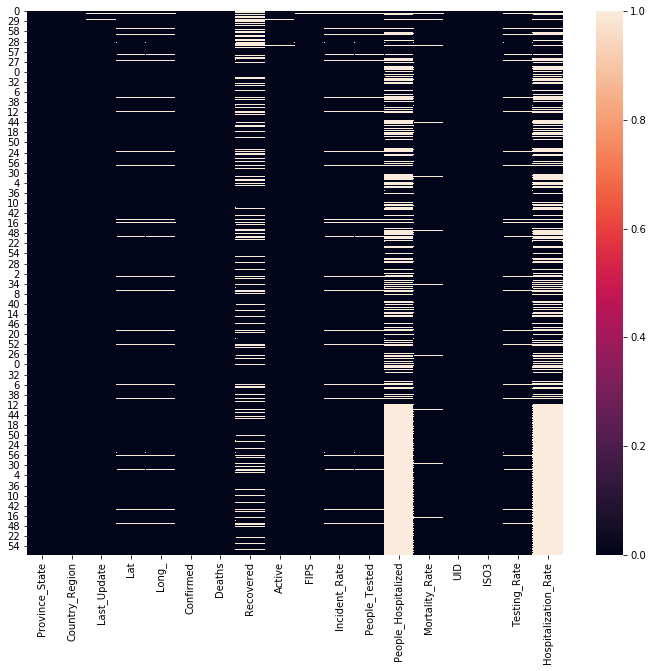

In [10]:
# plotting the missing values
plt.figure(figsize=(12,10))
sns.heatmap(df.isna())

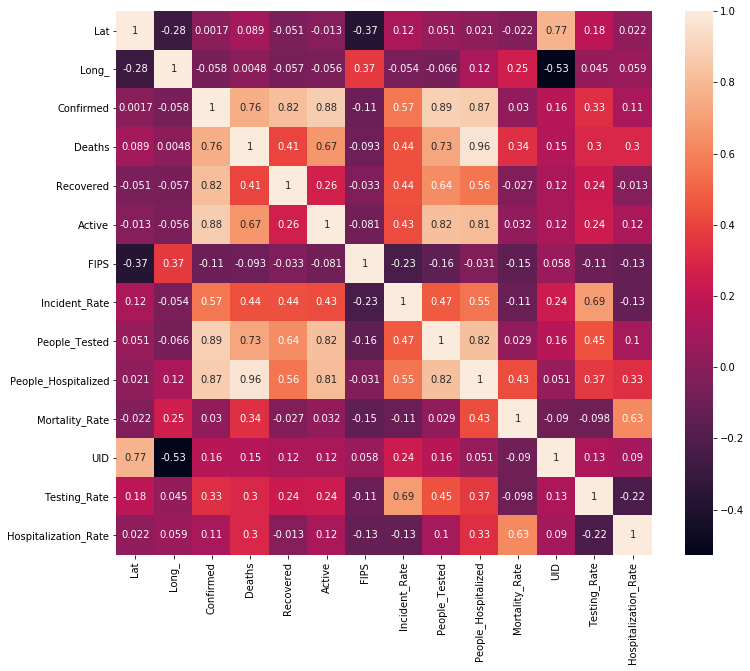

In [11]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot =True)

In [12]:
# Changing the Last update feature to date time datatype
df.Last_Update = pd.to_datetime(df.Last_Update)

In [13]:
# Changing the datatypes of other features to numeric 
df.Confirmed = pd.to_numeric(df.Confirmed)
df.Deaths = pd.to_numeric(df.Deaths)

In [14]:
# Creating indivisual features for Day, Month and week
df['Month'] = df.Last_Update.apply(lambda x:x.month_name())
df['Day_of_Yr'] = df.Last_Update.apply(lambda x:x.dayofyear)
df['Week_of_Yr'] = df.Last_Update.apply(lambda x:x.weekofyear)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11096 entries, 0 to 57
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Province_State        11096 non-null  object        
 1   Country_Region        11096 non-null  object        
 2   Last_Update           11077 non-null  datetime64[ns]
 3   Lat                   10696 non-null  float64       
 4   Long_                 10696 non-null  float64       
 5   Confirmed             11096 non-null  int64         
 6   Deaths                11096 non-null  int64         
 7   Recovered             8772 non-null   float64       
 8   Active                11079 non-null  float64       
 9   FIPS                  11077 non-null  float64       
 10  Incident_Rate         10696 non-null  float64       
 11  People_Tested         10696 non-null  float64       
 12  People_Hospitalized   5129 non-null   float64       
 13  Mortality_Rate     

In [18]:
# seperating the numnerical features 
num_var = df.select_dtypes (include= ['int64', 'float64'])

In [19]:
num_var.columns

Index(['Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS',
       'Incident_Rate', 'People_Tested', 'People_Hospitalized',
       'Mortality_Rate', 'UID', 'Testing_Rate', 'Hospitalization_Rate',
       'Day_of_Yr', 'Week_of_Yr'],
      dtype='object')

In [20]:
# seperating the categorical features 
cat_var = df.select_dtypes (include= ['object'])

In [21]:
cat_var.columns

Index(['Province_State', 'Country_Region', 'ISO3', 'Month'], dtype='object')

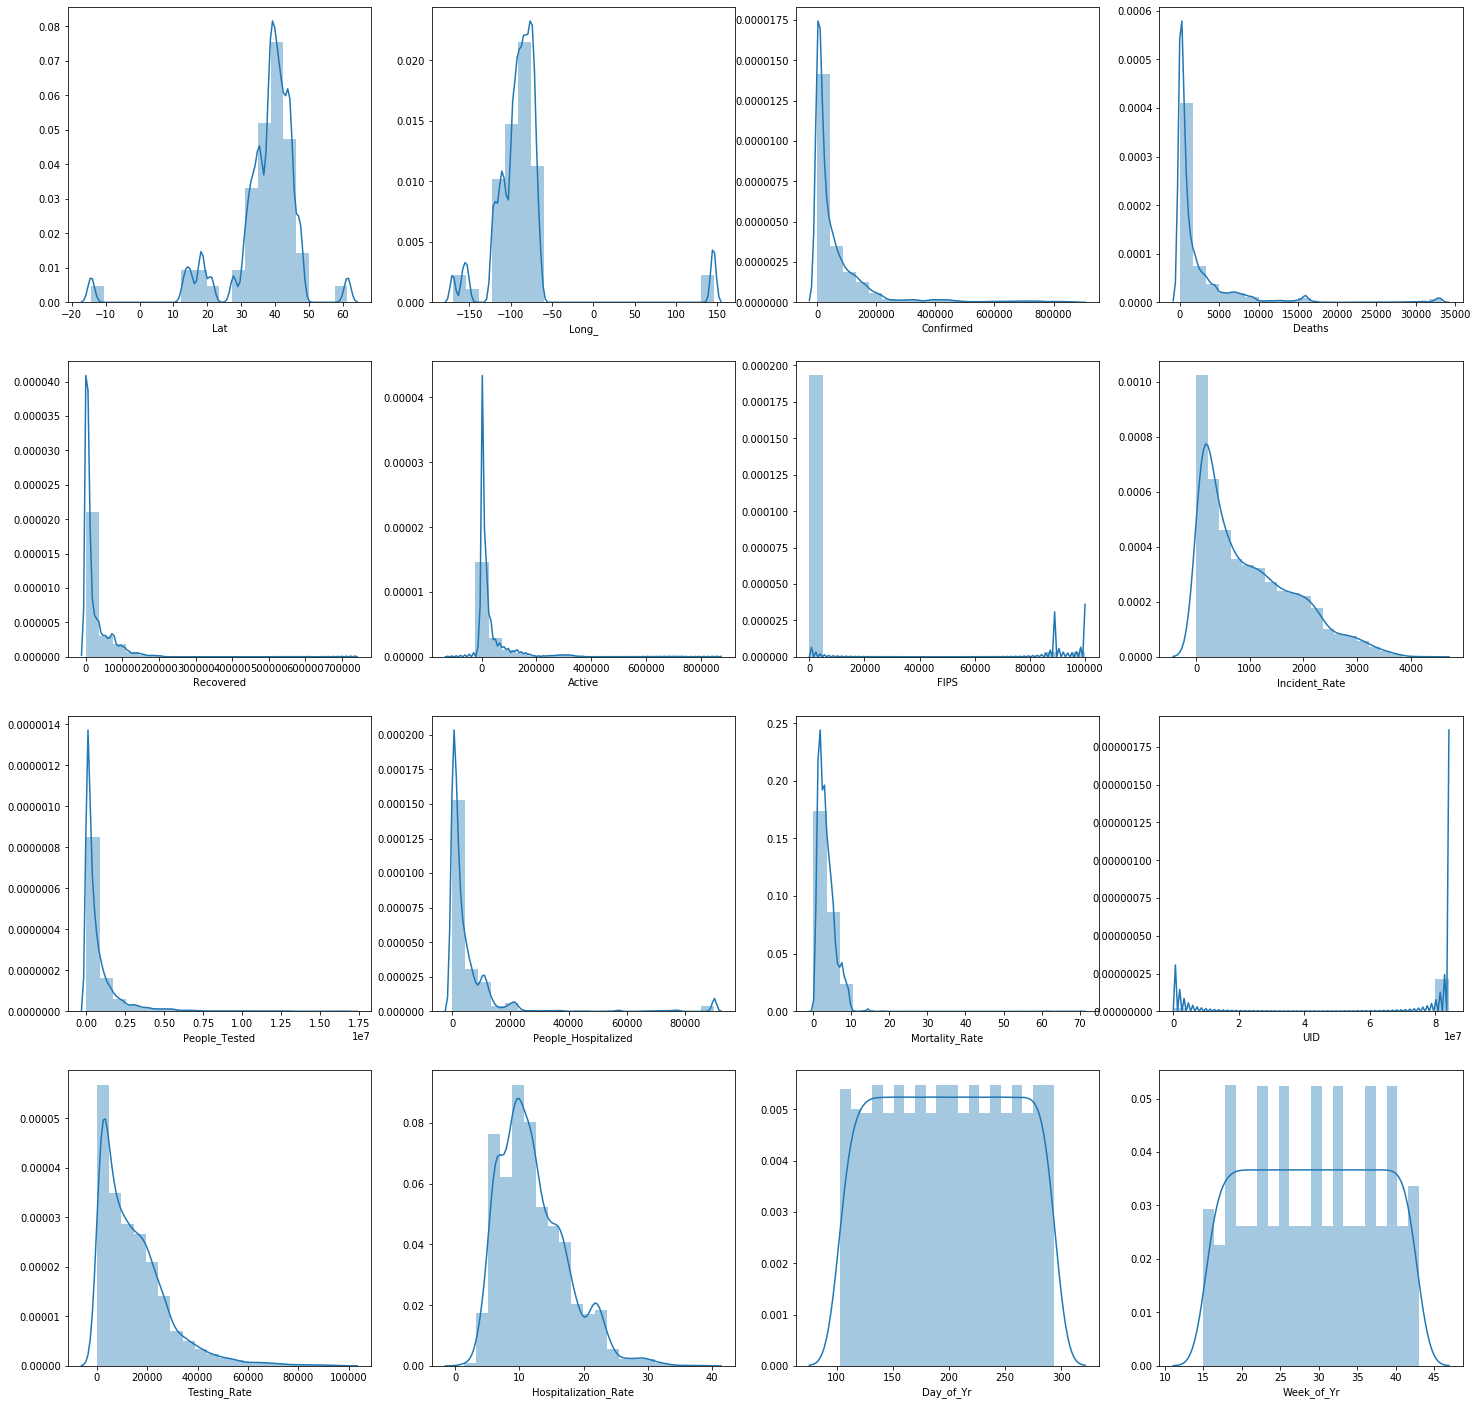

In [22]:
# checking the disribution of each feature
plt.figure(figsize=(25,25))       
for i,var in enumerate(num_var):
    plt.subplot(4,4,i+1)
    sns.distplot(df[var], bins=20)

### EDA

In [26]:
df.Confirmed.value_counts()

0         209
49        195
103       191
69         27
30         23
         ... 
605         1
6750        1
152159      1
8801        1
116         1
Name: Confirmed, Length: 9313, dtype: int64

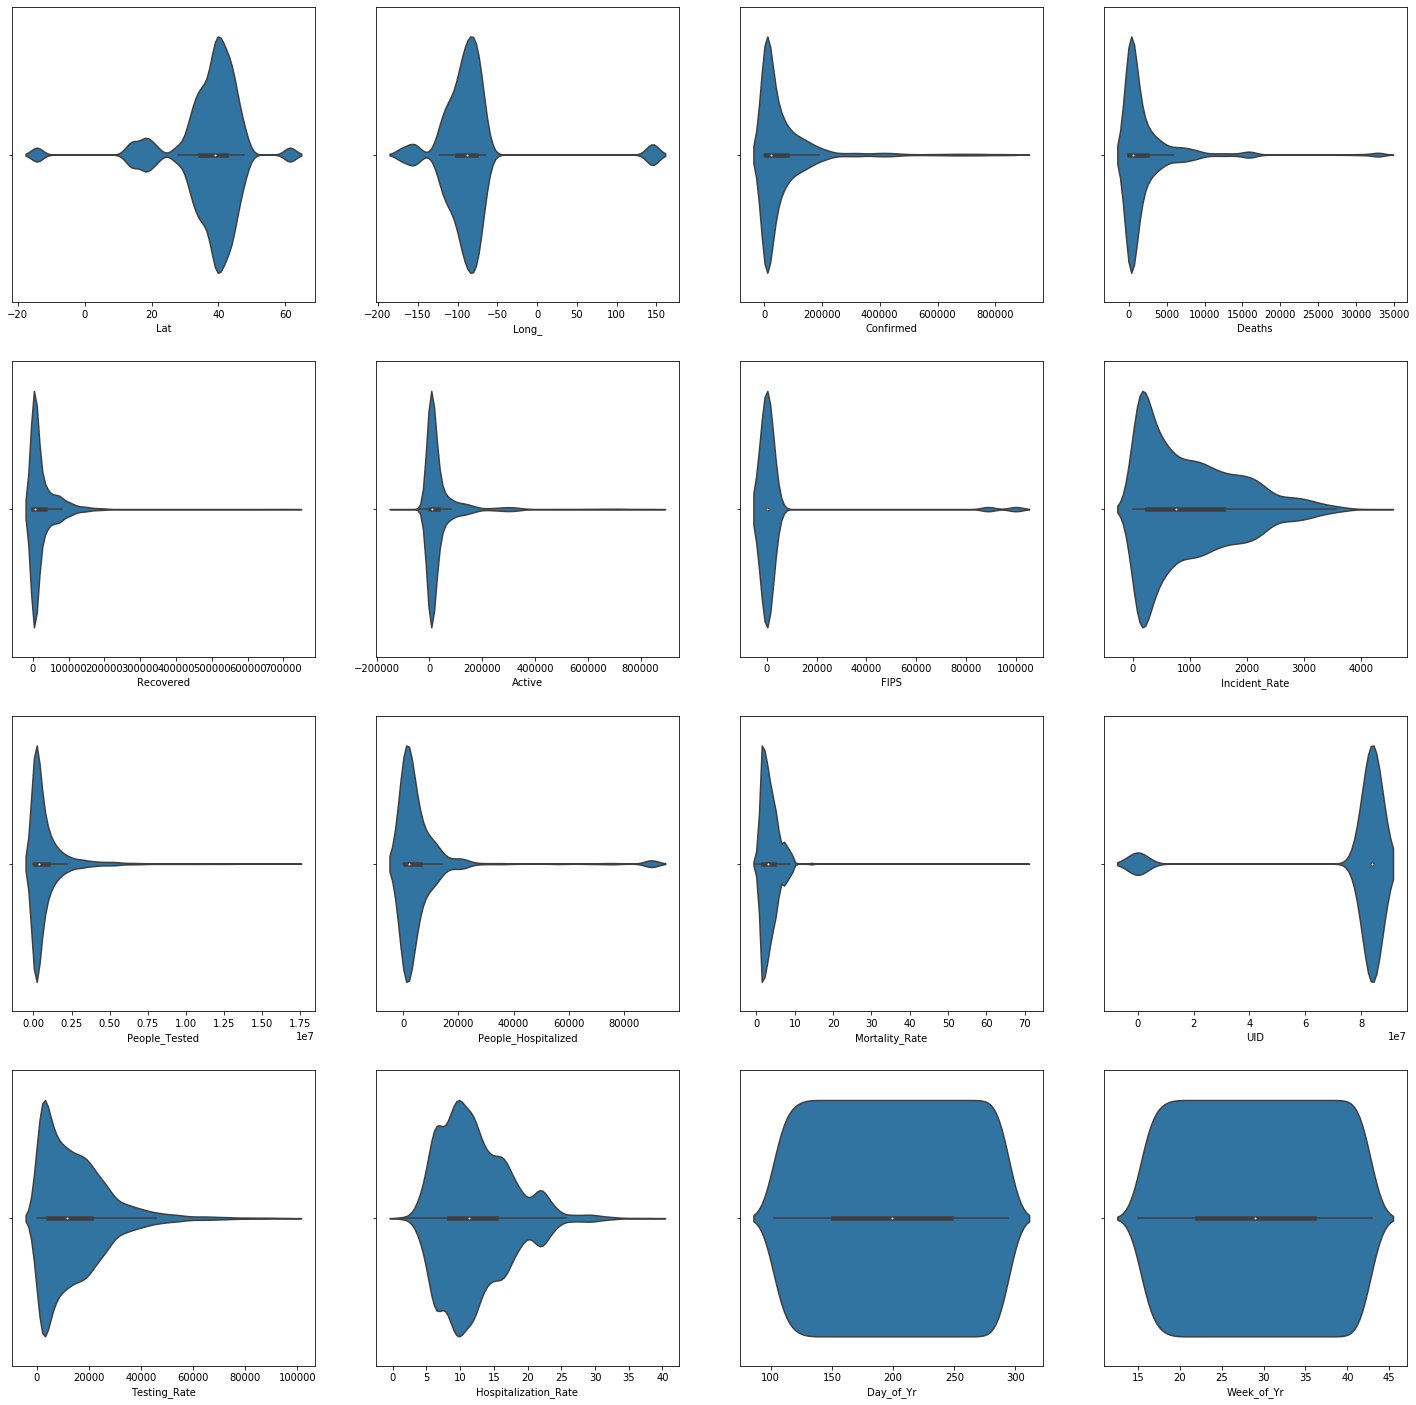

In [31]:
# checking the disribution of each feature
plt.figure(figsize=(25,25))       
for i,var in enumerate(num_var):
    plt.subplot(4,4,i+1)
    sns.violinplot(df[var])

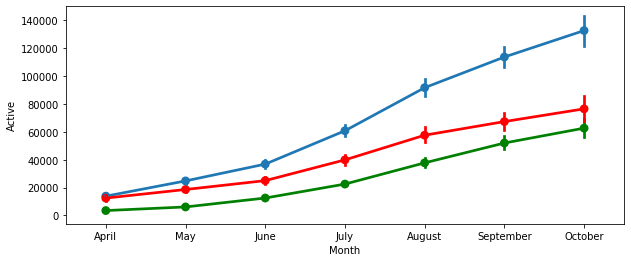

In [39]:
# Analysing cases by Month 
plt.figure(figsize=(10,4))
sns.pointplot(df.Month,df.Confirmed)
sns.pointplot(df.Month,df.Recovered,color='g')
sns.pointplot(df.Month,df.Active,color='r')

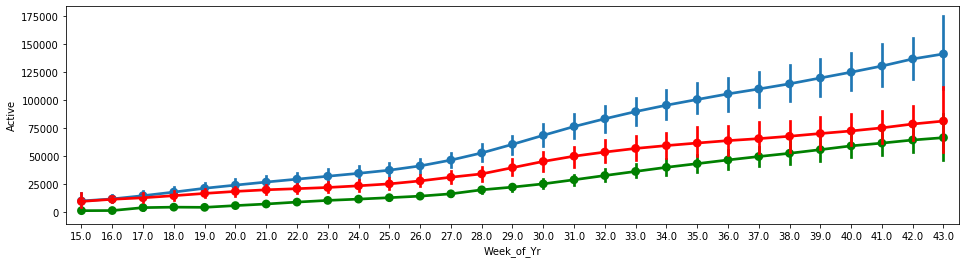

In [38]:
# Analysing cases by week
plt.figure(figsize=(16,4))
sns.pointplot(df.Week_of_Yr,df.Confirmed)
sns.pointplot(df.Week_of_Yr,df.Recovered,color='g')
sns.pointplot(df.Week_of_Yr,df.Active,color='r')

In [40]:
# Checking the cases by province

In [41]:
df.set_index('Province_State',inplace=True)

In [43]:
df_province = df.groupby('Province_State').mean()

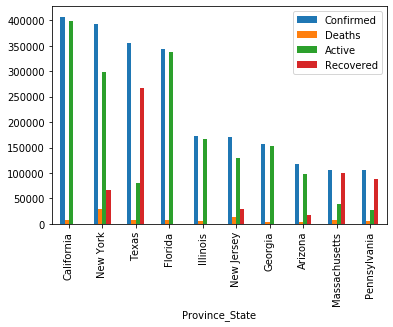

In [46]:
cols = ['Confirmed', 'Deaths', 'Active', 'Recovered']
# top 10 most affected Province or States
df_province[cols].sort_values('Confirmed',ascending=False)[:10].plot(kind='bar')
plt.legend(bbox_to_anchor = (1,1))

In [ ]:
# As we can see California has the maximum cases reported

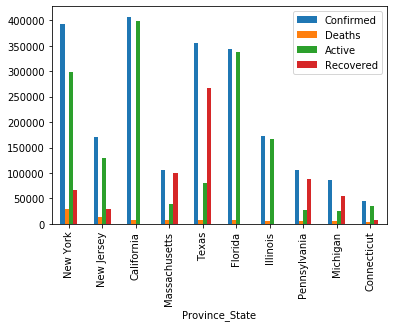

In [50]:
cols = ['Confirmed', 'Deaths', 'Active', 'Recovered']
# top 10 most affected Province or States
df_province[cols].sort_values('Deaths',ascending=False)[:10].plot(kind='bar')
plt.legend(bbox_to_anchor = (1,1))

In [ ]:
# As we can see New York has the maximum deaths reported

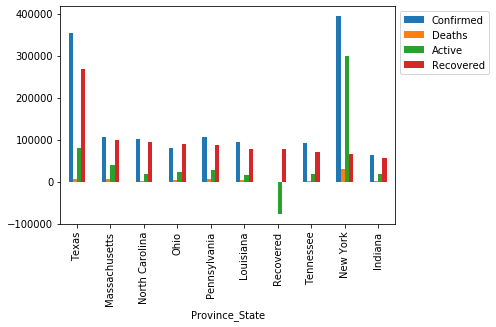

In [48]:
cols = ['Confirmed', 'Deaths', 'Active', 'Recovered']
# top 10 most affected Province or States
df_province[cols].sort_values('Recovered',ascending=False)[:10].plot(kind='bar')
plt.legend(bbox_to_anchor = (1,1))

In [ ]:
sns.pairplot(df)

In [69]:
df_clean = df.copy()

In [70]:
# Removing the features that are redundant and not required
df_clean.drop(['Country_Region','Last_Update','Lat','Long_','FIPS','UID','ISO3','Month'],1,inplace=True)

In [71]:
 df_clean.isnull().sum()/df.shape[0] *100

Confirmed                0.000000
Deaths                   0.000000
Recovered               20.944484
Active                   0.153208
Incident_Rate            3.604903
People_Tested            3.604903
People_Hospitalized     53.776136
Mortality_Rate           1.883562
Testing_Rate             3.604903
Hospitalization_Rate    53.776136
Day_of_Yr                0.171233
Week_of_Yr               0.171233
dtype: float64

In [72]:
# Dropping the features with more than 20% missing data
df_clean.drop(columns= ['People_Hospitalized' ,'Recovered', 'Hospitalization_Rate'] , inplace = True)

In [73]:
df_clean.isnull().sum()/df.shape[0] *100

Confirmed         0.000000
Deaths            0.000000
Active            0.153208
Incident_Rate     3.604903
People_Tested     3.604903
Mortality_Rate    1.883562
Testing_Rate      3.604903
Day_of_Yr         0.171233
Week_of_Yr        0.171233
dtype: float64

In [75]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11096 entries, Alabama to Wyoming
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Confirmed       11096 non-null  int64  
 1   Deaths          11096 non-null  int64  
 2   Active          11079 non-null  float64
 3   Incident_Rate   10696 non-null  float64
 4   People_Tested   10696 non-null  float64
 5   Mortality_Rate  10887 non-null  float64
 6   Testing_Rate    10696 non-null  float64
 7   Day_of_Yr       11077 non-null  float64
 8   Week_of_Yr      11077 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 866.9+ KB


In [77]:
df_impute = df_clean.copy()

In [78]:
df_impute.fillna(df_impute.mean() , inplace = True)

In [80]:
df_impute.isnull().sum()/df_impute.shape[0] *100

Confirmed         0.0
Deaths            0.0
Active            0.0
Incident_Rate     0.0
People_Tested     0.0
Mortality_Rate    0.0
Testing_Rate      0.0
Day_of_Yr         0.0
Week_of_Yr        0.0
dtype: float64

In [81]:
df_impute.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11096 entries, Alabama to Wyoming
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Confirmed       11096 non-null  int64  
 1   Deaths          11096 non-null  int64  
 2   Active          11096 non-null  float64
 3   Incident_Rate   11096 non-null  float64
 4   People_Tested   11096 non-null  float64
 5   Mortality_Rate  11096 non-null  float64
 6   Testing_Rate    11096 non-null  float64
 7   Day_of_Yr       11096 non-null  float64
 8   Week_of_Yr      11096 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 866.9+ KB


In [83]:
# function to create histogram, Q-Q plot and boxplot

# for Q-Q plots
import scipy.stats as stats

def diagnostic_plots(df_impute, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

******* Confirmed *******


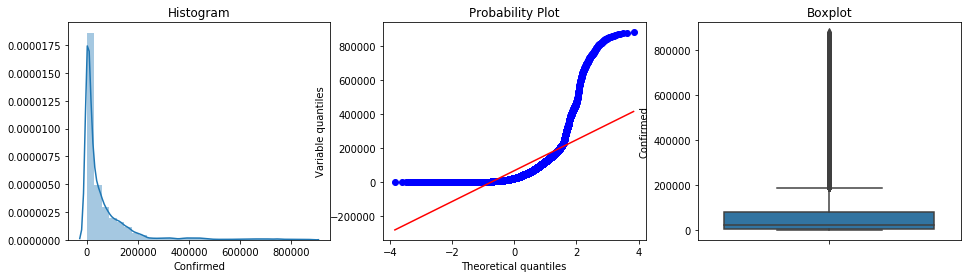

******* Deaths *******


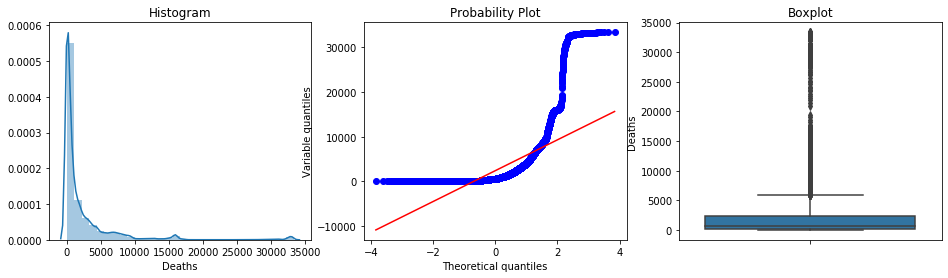

******* Active *******


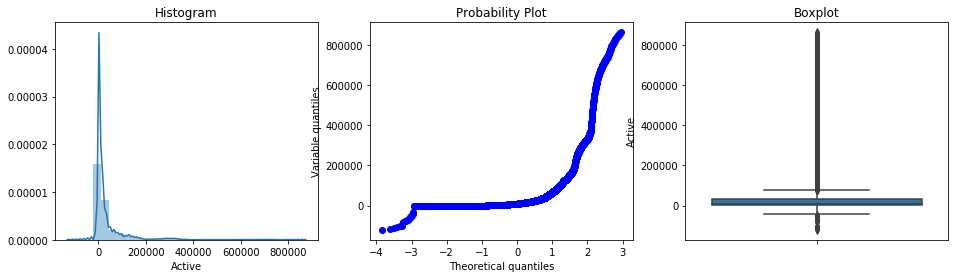

******* Incident_Rate *******


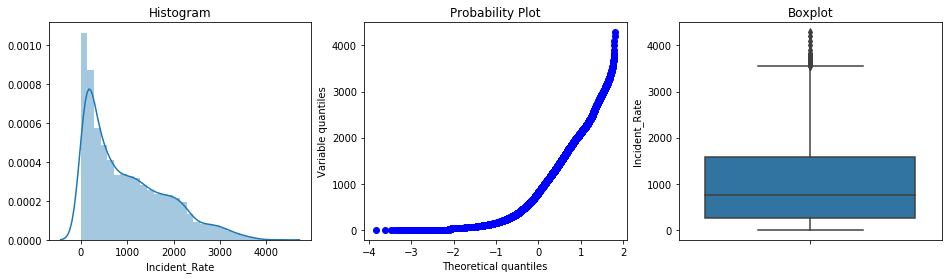

******* People_Tested *******


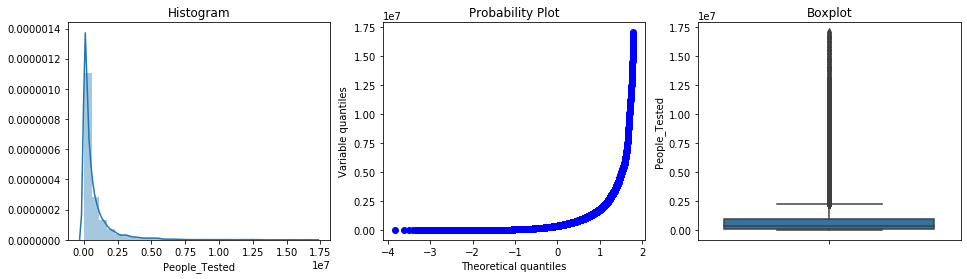

******* Mortality_Rate *******


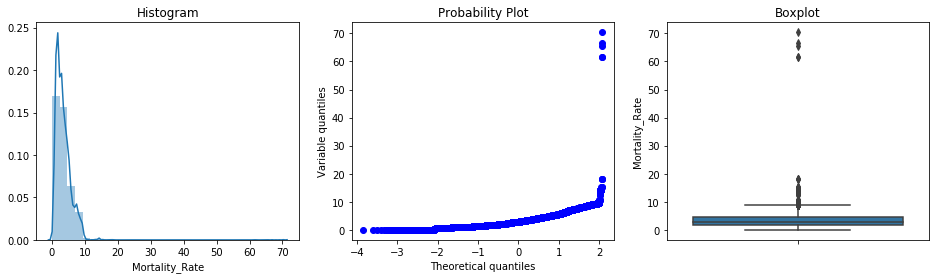

******* Testing_Rate *******


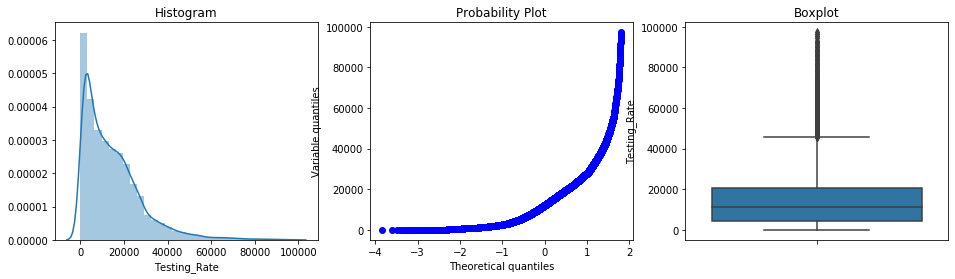

******* Day_of_Yr *******


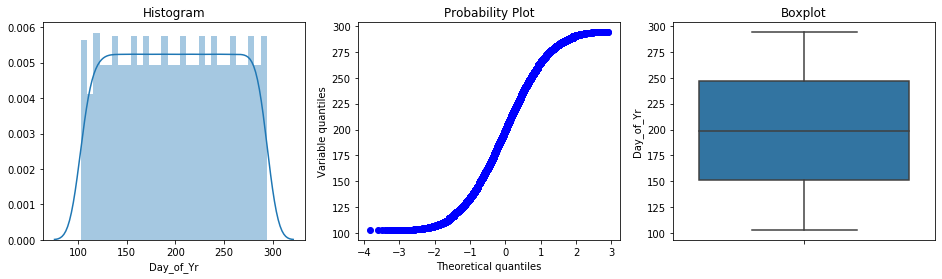

******* Week_of_Yr *******


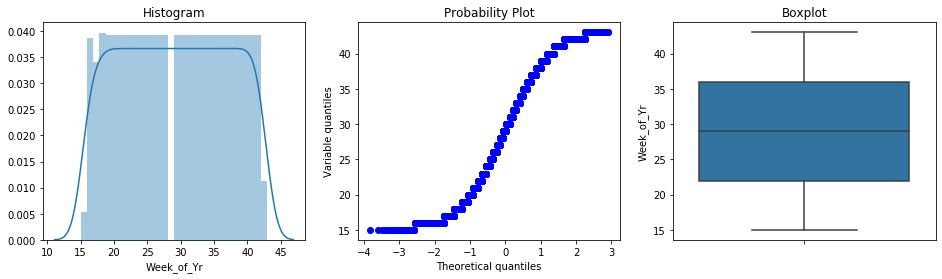

In [84]:
#  Checking the outliers
num_var = df_impute.columns
for var in num_var:
  print("******* {} *******".format(var))
  diagnostic_plots(df_impute, var)

  # here we observe outlier using histogram,, qq plot and boxplot 

In [ ]:
# From the above plots we can identify that there are no ouliers in 'Day_of_Yr', 'Week_of_Yr' features

In [89]:
from scipy.stats import zscore
z_scores = stats.zscore(df_impute)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)

df_impute = df_impute[filtered_entries]

In [90]:
df_clean.shape

(11096, 9)

In [91]:
df_impute.shape

(10382, 9)

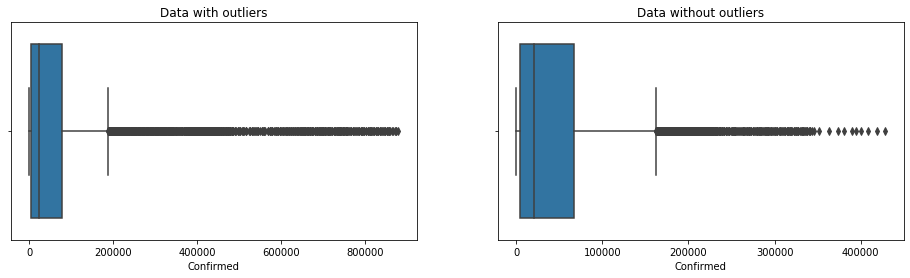

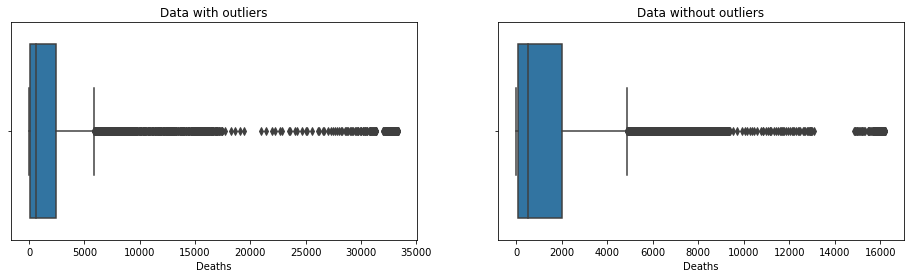

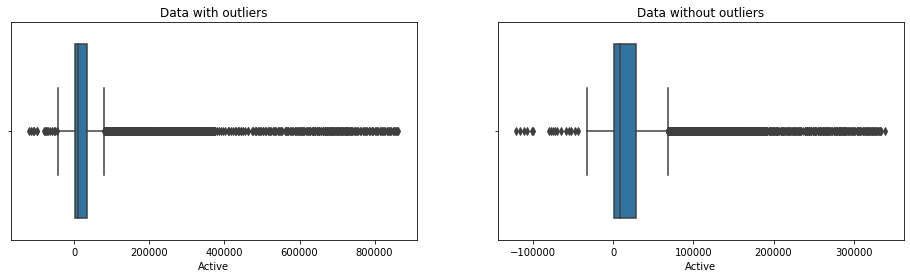

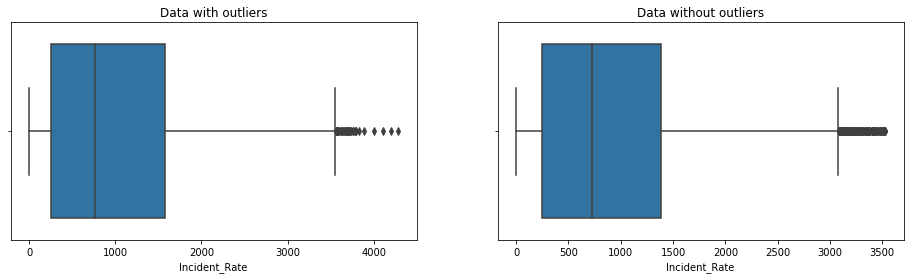

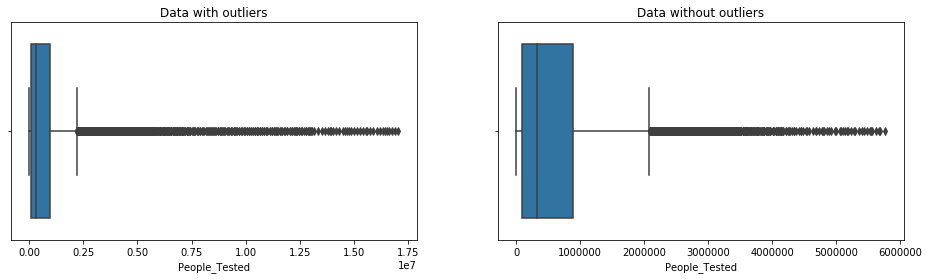

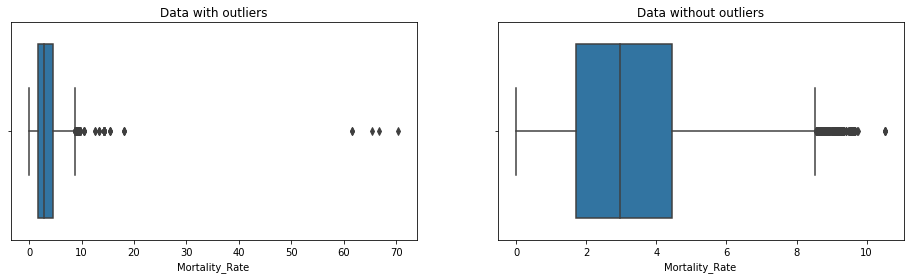

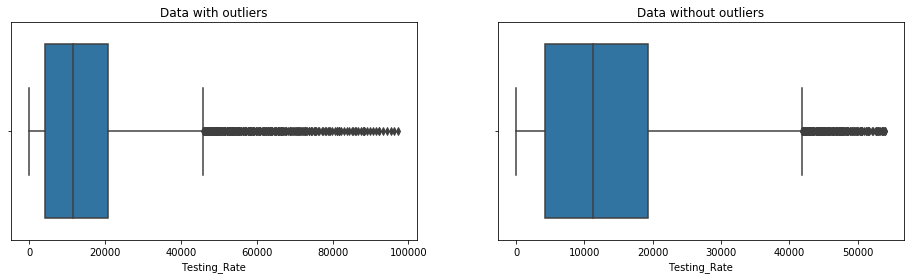

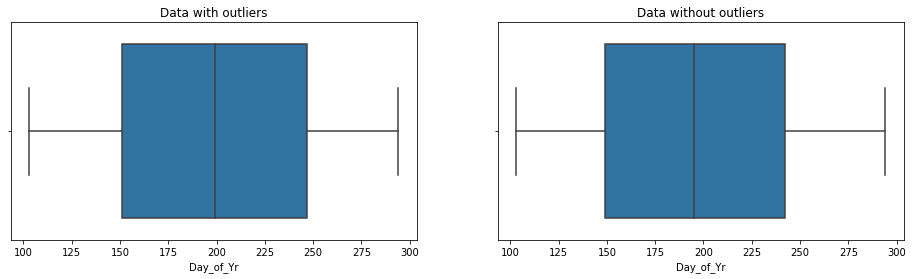

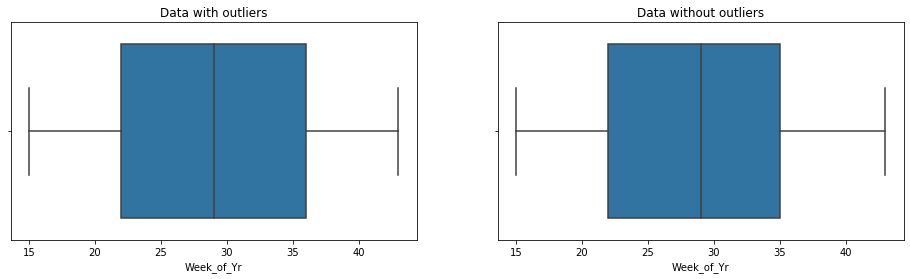

In [96]:
# before and after removing the outliers
for col in df_impute:
    fig = plt.figure(figsize=(16, 4))
    
    fig.add_subplot(121)
    sns.boxplot(df[col])
    plt.title('Data with outliers')
    
    fig.add_subplot(122)
    sns.boxplot(df_impute[col])
    plt.title('Data without outliers')

In [98]:
# Checking the skewness 
df_impute.skew()

Confirmed         1.916378
Deaths            2.885142
Active            3.071336
Incident_Rate     0.979350
People_Tested     2.293216
Mortality_Rate    0.918261
Testing_Rate      1.040261
Day_of_Yr         0.047840
Week_of_Yr        0.048847
dtype: float64

In [99]:
# Treating the skewness using Sqrt Transformation
np.sqrt(df_impute).skew()

Confirmed         0.716600
Deaths            1.171478
Active            1.377223
Incident_Rate     0.176196
People_Tested     0.870860
Mortality_Rate   -0.099097
Testing_Rate      0.175166
Day_of_Yr        -0.135075
Week_of_Yr       -0.129834
dtype: float64

In [100]:
# Treating the skewness using Sqrt Transformation
np.log1p(df_impute).skew()

Confirmed        -1.493227
Deaths           -0.807101
Active           -1.078847
Incident_Rate    -1.822386
People_Tested    -1.380093
Mortality_Rate   -0.232193
Testing_Rate     -1.246872
Day_of_Yr        -0.323312
Week_of_Yr       -0.301409
dtype: float64

In [101]:
# Finalysing the Sqrt Transformation 
df_impute = np.sqrt(df_impute)

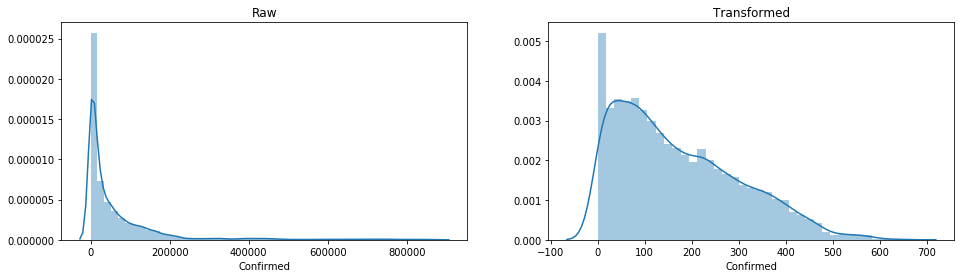

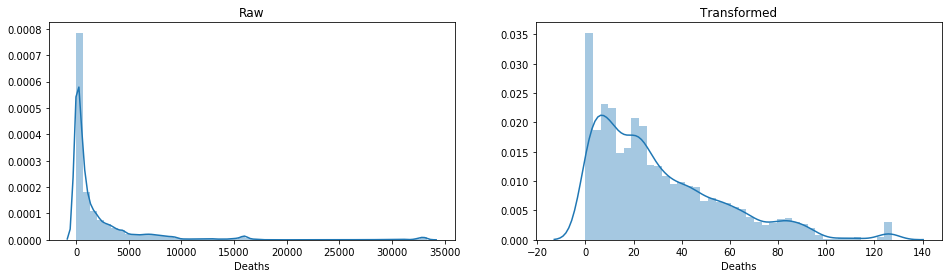

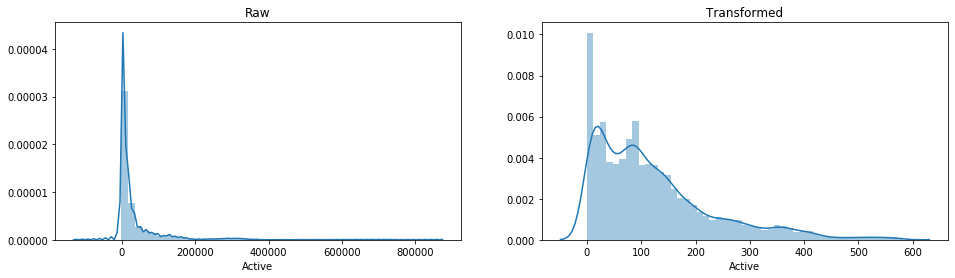

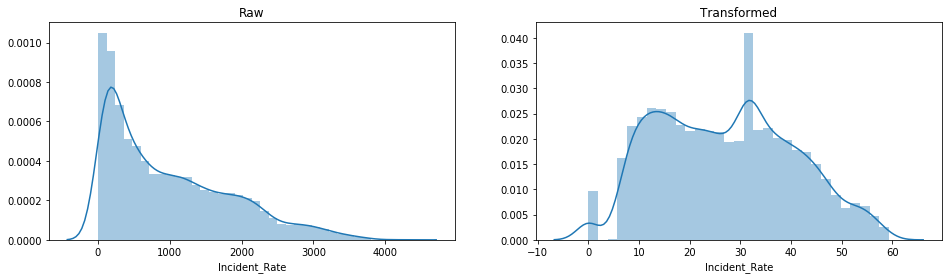

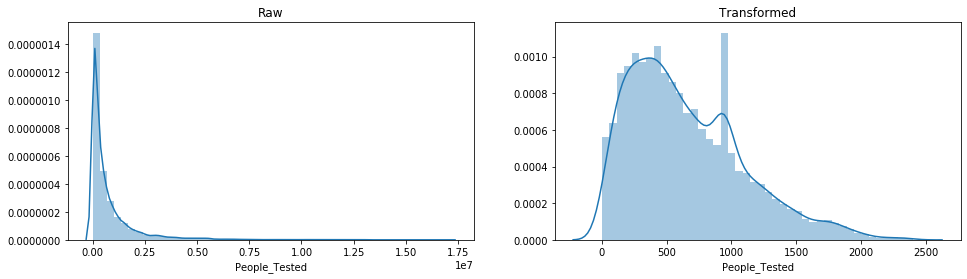

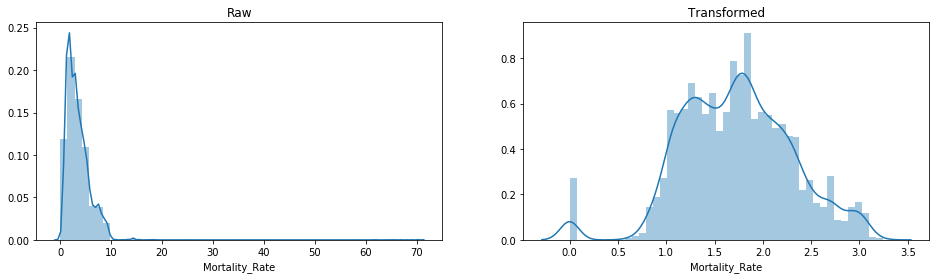

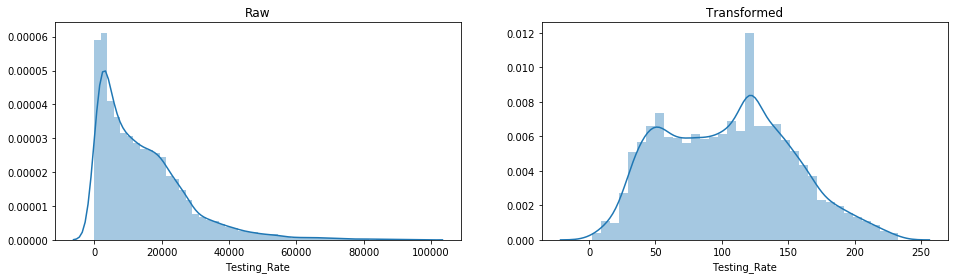

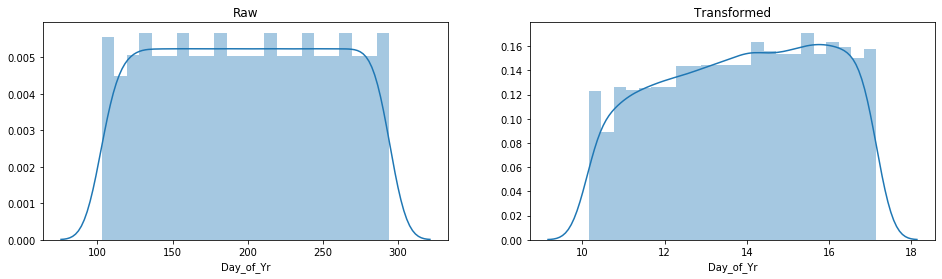

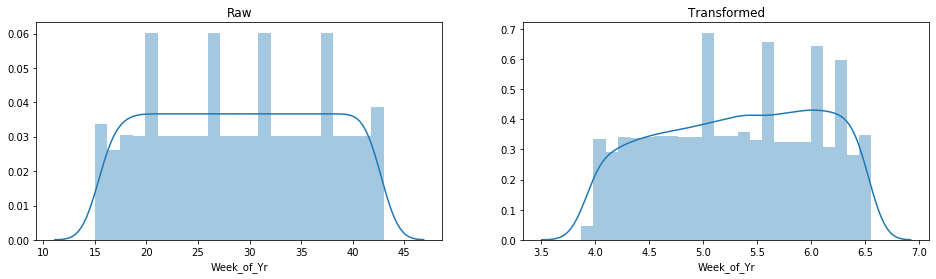

In [102]:
# before and after : skew transformation
for col in df_impute.columns:
    fig = plt.figure(figsize=(16,4))
    
    fig.add_subplot(121)
    sns.distplot(df[col])
    plt.title('Raw')
    fig.add_subplot(122)
    sns.distplot(df_impute[col])
    plt.title('Transformed')

In [112]:
df_impute.isna().sum()

Confirmed          0
Deaths             0
Active            19
Incident_Rate      0
People_Tested      0
Mortality_Rate     0
Testing_Rate       0
Day_of_Yr          0
Week_of_Yr         0
dtype: int64

In [113]:
df_impute.dropna(inplace=True)

In [114]:
x = df_impute.drop('Mortality_Rate',1)
y = df_impute['Mortality_Rate']

In [115]:
#Split data into separate training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.2, random_state=0)
print('Shape of x_train = ', x_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of x_test = ', x_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of x_train =  (8290, 8)
Shape of y_train =  (8290,)
Shape of x_test =  (2073, 8)
Shape of y_test =  (2073,)


In [116]:
# import training dependencies
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor

In [117]:
# import the evaluation metrics dependenices
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_squared_error

In [118]:
from sklearn.model_selection import train_test_split, cross_val_score , GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor

In [119]:
LR=LinearRegression(normalize=True)
LA=Lasso(alpha=0.1 , random_state= 75)
RI=Ridge(alpha=0.1 , random_state= 75)
EN=ElasticNet(alpha=0.1 , random_state= 75)
KNR=KNeighborsRegressor(n_neighbors= 4)
DTR=DecisionTreeRegressor(random_state= 65)
ABR=AdaBoostRegressor(random_state= 95)
RFR=RandomForestRegressor(random_state= 54)
GBR=GradientBoostingRegressor(learning_rate= 0.01, n_estimators= 100 ,random_state=65)
XGR=XGBRegressor(random_state = 61)

In [120]:
models=[]
models.append(('LinearRegression',LR))
models.append(('Lasso',LA))
models.append(('Ridge',RI))
models.append(('ElasticNet',EN))
models.append(('DecisionTreeRegressor',DTR))
models.append(('KNeighborsRegressor',KNR))
models.append(('AdaBoostRegressor',ABR))
models.append(('RandomForestRegressor',RFR))
models.append(('GradientBoostingRegressor',GBR))
models.append(('XGBRegressor',XGR))

In [121]:
Model=[]
R2_score=[]
cvs=[]
MSE=[]
for name,model in models:   
    Model.append(name)
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    r2=r2_score(y_test,pre)    
    R2_score.append(r2)
    mse=mean_squared_error(y_test,pre)    
    MSE.append(round(mse,3))
    score= cross_val_score(model,x,y).mean()    
    cvs.append(round(score,3))

In [122]:
result = pd.DataFrame({'Model': Model, 'R2_score': R2_score ,'Mean_Squared_Error' :MSE,'Cross_val_score':cvs})
result

,Model,R2_score,Mean_Squared_Error,Cross_val_score
0,LinearRegression,0.676511,0.103,0.628
1,Lasso,0.674827,0.103,0.631
2,Ridge,0.676512,0.103,0.628
3,ElasticNet,0.674578,0.103,0.631
4,DecisionTreeRegressor,0.988217,0.004,0.752
5,KNeighborsRegressor,0.979396,0.007,0.167
6,AdaBoostRegressor,0.619076,0.121,0.537
7,RandomForestRegressor,0.997090,0.001,0.863
8,GradientBoostingRegressor,0.505956,0.157,0.351
9,XGBRegressor,0.994537,0.002,0.906


In [123]:
# As we can see from above trials the best performance is given by XGBRegressor so it is the final model selected

In [124]:
# SAVING THE BEST MODEL:
import joblib
joblib.dump(XGR,'Covid.pkl')

['Covid.pkl']

In [ ]:
plt.figure(figsize=(10,4))
sns.pointplot(df.Week_of_Yr,df.Confirmed)
sns.pointplot(df.Week_of_Yr,df.Recovered,color='g')
sns.pointplot(df.Week_of_Yr,df.Active,color='r')